# Reducing the number of auxiliary qubits in Grovers Algorithm

In [6]:
from pytket.circuit import Circuit, Qubit, OpType
from pytket.extensions.qiskit import tk_to_qiskit

### **Basic setup of auxiliary qubits**

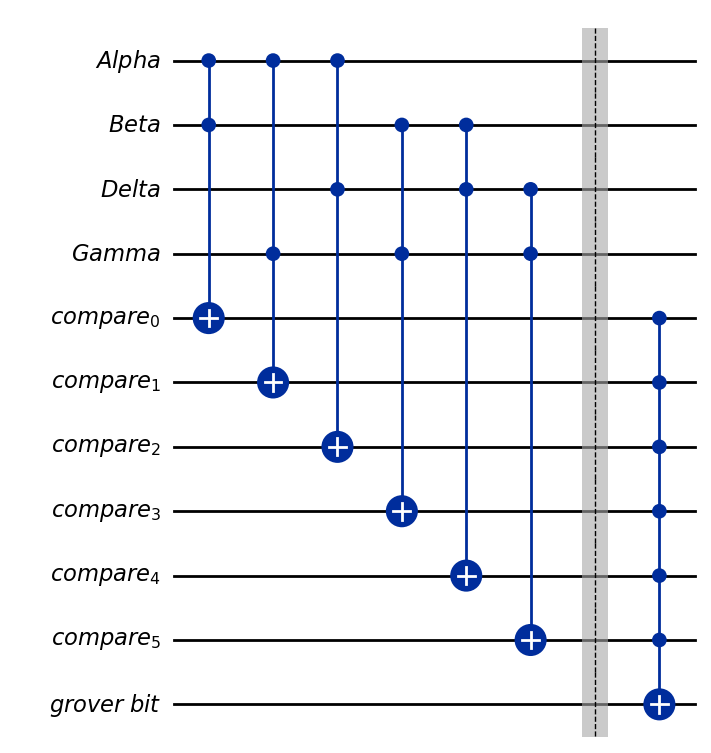

In [28]:
grover_oracle = Circuit()

# Coding qubits
alpha = Qubit("Alpha", 0)
beta = Qubit("Beta", 0)
gamma = Qubit("Gamma", 0)
delta = Qubit("Delta", 0)
grover_oracle.add_qubit(alpha)
grover_oracle.add_qubit(beta)
grover_oracle.add_qubit(gamma)
grover_oracle.add_qubit(delta)

# Auxiliary qubits
auxiliar_reg = Circuit()
auxiliar_reg.add_q_register("compare", 6)
grover_oracle.append(auxiliar_reg)

# Grover bit
grover_bit = Qubit("grover bit", 0)
grover_oracle.add_qubit(grover_bit)

# Comparing operations
grover_oracle.CCX(alpha, beta, Qubit("compare", 0))
grover_oracle.CCX(alpha, gamma, Qubit("compare", 1))
grover_oracle.CCX(alpha, delta, Qubit("compare", 2))
grover_oracle.CCX(beta, gamma, Qubit("compare", 3))
grover_oracle.CCX(beta, delta, Qubit("compare", 4))
grover_oracle.CCX(gamma, delta, Qubit("compare", 5))

grover_oracle.add_barrier(grover_oracle.qubits)

grover_oracle.add_gate(OpType.CnX, auxiliar_reg.qubits + [grover_bit])

tk_to_qiskit(grover_oracle).draw('mpl')

